In [125]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
import shap
from matplotlib.font_manager import FontProperties
shap.initjs()

In [126]:
# 指定文件路径
file_path = "../SOH1/EIS_state_V/EIS_V.txt"

# 读取文本文件，使用多个制表符作为分隔符
data = pd.read_csv(file_path, sep='\t', header=None, names=["Z_" + str(i) for i in range(120)])

# 显示前几行数据
data.head()

,Z_0,Z_1,Z_2,Z_3,Z_4,Z_5,Z_6,Z_7,Z_8,Z_9,...,Z_110,Z_111,Z_112,Z_113,Z_114,Z_115,Z_116,Z_117,Z_118,Z_119
0,0.38470,0.39156,0.39684,0.40341,0.40963,0.41925,0.42764,0.43530,0.44525,0.45744,...,0.08888,0.10230,0.11767,0.13411,0.15473,0.18024,0.21535,0.25411,0.29026,0.32795
1,0.38886,0.39343,0.40066,0.40798,0.41472,0.42210,0.43087,0.44032,0.45061,0.46045,...,0.09005,0.10526,0.12138,0.13894,0.15901,0.18200,0.21310,0.24700,0.28064,0.32300
2,0.39038,0.39600,0.40250,0.40874,0.41617,0.42422,0.43090,0.44257,0.45141,0.46294,...,0.09073,0.10267,0.11865,0.14024,0.16487,0.18764,0.21288,0.24707,0.28773,0.32955
3,0.39194,0.39643,0.40406,0.41059,0.41739,0.42510,0.43446,0.44279,0.45283,0.46578,...,0.09112,0.10434,0.12045,0.13810,0.15939,0.18213,0.21587,0.25741,0.29768,0.33673
4,0.39225,0.39760,0.40540,0.41088,0.41967,0.42648,0.43666,0.44412,0.45343,0.46610,...,0.09144,0.10645,0.12356,0.14088,0.16121,0.18483,0.21609,0.24984,0.28396,0.32562


In [127]:
#配色
greense = (0/255, 151/255, 37/255,1)
bluese = (0/255, 139/255, 251/255,1)
redse = (255/255, 0/255, 78/255,1)
purplese = (196/255, 78/255, 212/255,1)
brownse = (208/255, 134/255, 48/255,1)
greyse = (158/255, 158/255, 158/255,1)
bluegreyse = (76/255, 114/255, 176/255,1)

font = FontProperties(family='Arial', size=12)

In [128]:
np.shape(data)

(2301, 120)

In [129]:
# 指定 y 文件的路径
# y_file_path = "../SOH1/合集数据/SOH_all_40_temp.txt"
# y_file_path = "../SOH1/SOH_all_1.txt"
y_file_path = "../SOH1/合集数据/NEWSOH_all_40.txt"
# 读取 y 文件
with open(y_file_path, "r") as file:
    # 逐行读取 y 值，将其转换为浮点数并存储在一个列表中
    y_values = [float(line.strip()) for line in file]

# 将 y 值存储在 Pandas Series 中
y_series = pd.Series(y_values, name="SOH")

# 显示前几个 y 值
np.shape(y_series)

(2301,)

In [130]:
L1=list(range(0, 190))
L2=list(range(190, 370))
L3=list(range(370, 571))
L4=list(range(571, 605))
L5=list(range(605, 798))
L6=list(range(798, 953))
L7=list(range(954, 1046))
L8=list(range(1047, 1082))

L9=list(range(1083, 1377))
L10=list(range(1377, 1694))
L11=list(range(1694, 1991))
L12=list(range(1992, 2301))

In [131]:
C0 = data
#25
C1 = data.loc[L1].copy()
C2 = data.loc[L2].copy()
C3 = data.loc[L3].copy()
C4 = data.loc[L4].copy() ##坏的,不可单独使用
C5 = data.loc[L5].copy()  ##24678d坏的
C6 = data.loc[L6].copy()
C7 = data.loc[L7].copy()
C8 = data.loc[L8].copy() ##坏的
#35
C9 = data.loc[L9].copy()
C10 = data.loc[L10].copy()
#45
C11 = data.loc[L11].copy()
C12 = data.loc[L12].copy()

In [132]:
Y0 = y_series
#25
Y1 = y_series.loc[L1].copy()
Y2 = y_series.loc[L2].copy()
Y3 = y_series.loc[L3].copy()

Y4 = y_series.loc[L4].copy() ##坏的,不可单独使用
Y5 = y_series.loc[L5].copy()  ##24678d坏的

Y6 = y_series.loc[L6].copy()
Y7 = y_series.loc[L7].copy()

Y8 = y_series.loc[L8].copy() ##坏的
#35
Y9 = y_series.loc[L9].copy()
Y10 = y_series.loc[L10].copy()
#45
Y11 = y_series.loc[L11].copy()
Y12 = y_series.loc[L12].copy()

In [133]:
# #1,3,5,9,10,11,12
# waqu = list(range(0, 954)) + list(range(1047, 2300))
waqu =L1 +L3 +L5+L10+ L11+L12
#9,11,12
# Use iloc to select the rows
X_train = data.loc[waqu].copy()
y_train = y_series.loc[waqu].copy()

X_test = C9
y_test = Y9

In [134]:
select_battery = '9'
MLmodel = 'DecisionTree'

In [135]:
print("训练集",np.shape(X_train),np.shape(y_train),"测试集",np.shape(X_test),np.shape(y_test))

训练集 (1507, 120) (1507,) 测试集 (294, 120) (294,)


In [136]:
select_battery

'9'

数据读取完毕，开始可视化。

## 第一次计算精度，全部特征

In [137]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [138]:
# train model

model = DecisionTreeRegressor()
model.fit(X_train, y_train)


DecisionTreeRegressor()

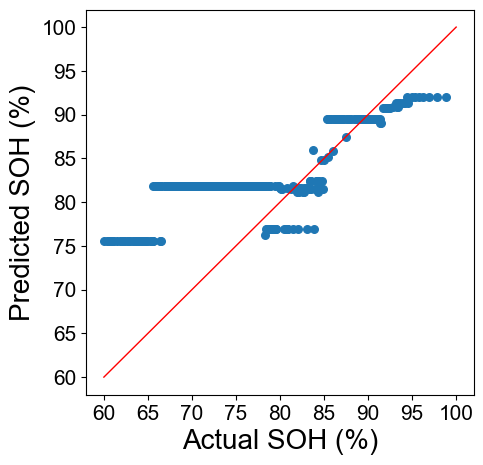

In [139]:
# get predictions
y_pred = model.predict(X_test)
# model evaluation
plt.figure(figsize=(5, 5))

plt.scatter(y_test, y_pred,s=30)
plt.plot([60, 100], [60, 100], color="r", linestyle="-", linewidth=1)

plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15
plt.ylabel("Predicted SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
plt.xlabel("Actual SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_all_z.pdf", format='pdf', dpi=600, bbox_inches='tight')
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_all_z.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()
plt.close()

In [140]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# mse = mean_squared_error(y, y_pred)
mse_all = mean_squared_error(y_test, y_pred)
print("均方误差 (MSE):", mse_all)

rmse_all = np.sqrt(mse_all)
print("均方根误差 (RMSE):", rmse_all)

# r2 = r2_score(y, y_pred)
r2_all = r2_score(y_test, y_pred)
print("决定系数 (R^2):", r2_all)

均方误差 (MSE): 66.67762218900369
均方根误差 (RMSE): 8.16563666770716
决定系数 (R^2): 0.2067269898862506


1) Standard SHAP values

In [141]:
%%time
# get shap values
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# shap_values = explainer(X[0:100])

Wall time: 389 ms


In [142]:
# shap_values_values = np.array(shap_values.values)

# # 保存到文件
# np.savetxt('shap_values_values.txt', shap_values_values)

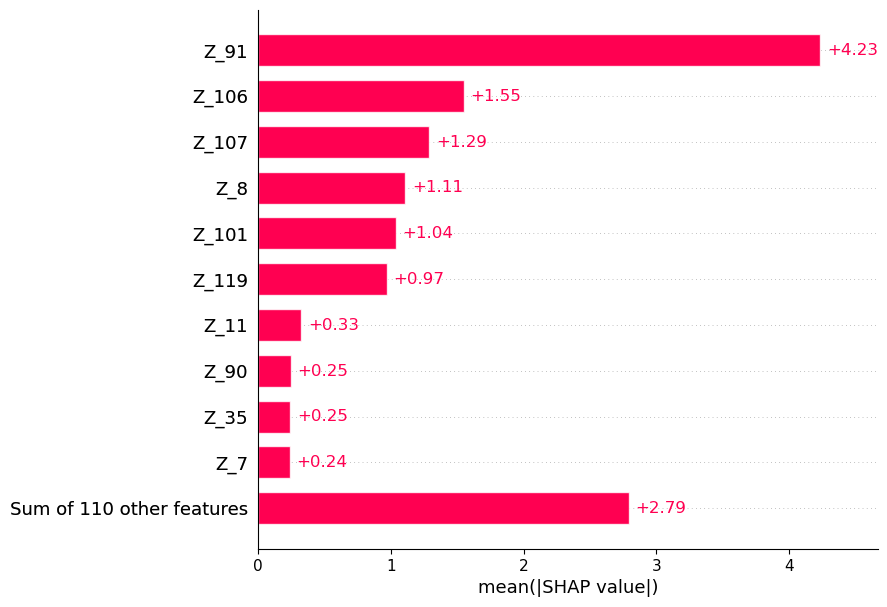

In [143]:
# mean SHAP
shap.plots.bar(shap_values, max_display=11,show=False)
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_meanshap.pdf", format='pdf', dpi=600, bbox_inches='tight')
# # plt.savefig('mean shap.pdf', format='pdf', dpi=600, bbox_inches='tight')
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_meanshap.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()
plt.close()

In [144]:
# 计算绝对值并按列求和
abs_shap_values = np.abs(shap_values.values) #取绝对值
mean = abs_shap_values.sum(axis=0) #求和

# 获取前k个最大值
k = 10
meantop = mean.argsort()[-k:][::-1]
meanbottom = mean.argsort()[:k]
#shap值
num_samples = shap_values.values.shape[0]
normalized_mean = mean / num_samples

# mean 中的前k个最大值
top_k_values = normalized_mean[meantop]
top_k_values

array([4.23329047, 1.55271463, 1.28998797, 1.10888739, 1.03883574,
       0.96997629, 0.32835552, 0.24755453, 0.24553647, 0.24025927])

In [145]:
np.shape(shap_values.values)

(294, 120)

In [146]:
print(meantop)
print(meanbottom)

[ 91 106 107   8 101 119  11  90  35   7]
[ 50  24  33  18   0  43  66 108  37  23]


In [147]:
X_top10_test = X_test.iloc[:, meantop]
# print(X_top10_test)
X_top10 = X_train.iloc[:, meantop]
# print(X_top10)
# train model

model_select =  DecisionTreeRegressor()
# model.fit(X, y)
model_select.fit(X_top10, y_train)

y_pred_select = model_select.predict(X_top10_test)

## 模型预测

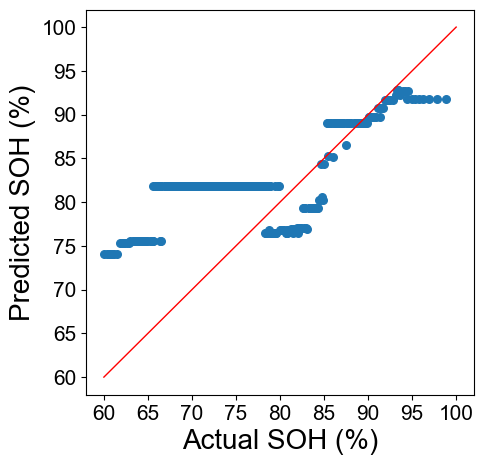

In [148]:
# get predictions
# y_pred = model.predict(X)
y_pred_select = model_select.predict(X_top10_test)
# model evaluation
plt.figure(figsize=(5, 5))

plt.scatter(y_test, y_pred_select,s=30)
plt.plot([60, 100], [60, 100], color="r", linestyle="-", linewidth=1)

plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15
plt.ylabel("Predicted SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
plt.xlabel("Actual SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_top10.pdf", format='pdf', dpi=600, bbox_inches='tight')
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_top10.jpg", format='jpg', dpi=600, bbox_inches='tight')
plt.show()
plt.close()

计算结果

In [149]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# mse = mean_squared_error(y, y_pred)
mse_preferred = mean_squared_error(y_test, y_pred_select)
rmse_preferred = np.sqrt(mse_preferred)
r2_preferred = r2_score(y_test, y_pred_select)

print("均方误差 (MSE):", mse_all)
print("均方根误差 (RMSE):", rmse_all)
print("决定系数 (R^2):", r2_all)
print("top10Z 均方误差 (MSE):", mse_preferred)
print("top10Z 均方根误差 (RMSE):", rmse_preferred)

print("top10Z 决定系数 (R^2):", r2_preferred)

均方误差 (MSE): 66.67762218900369
均方根误差 (RMSE): 8.16563666770716
决定系数 (R^2): 0.2067269898862506
top10Z 均方误差 (MSE): 67.28186182456894
top10Z 均方根误差 (RMSE): 8.202552153114842
top10Z 决定系数 (R^2): 0.19953826631155291


bottom_10个Z的训练

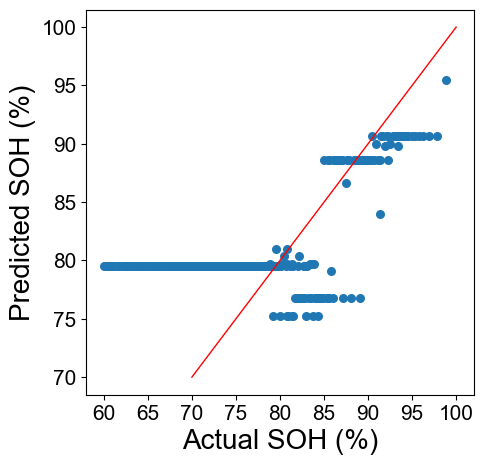

In [150]:
X_bot10_test = X_test.iloc[:, meanbottom]
# print(X_top10_test)
X_bot10_train = X_train.iloc[:, meanbottom]
# print(X_top10)
# train model
model_select_bot = DecisionTreeRegressor()
# model.fit(X, y)
model_select_bot.fit(X_bot10_train, y_train)

# get predictions
# y_pred = model.predict(X)
y_pred_select_bot = model_select_bot.predict(X_bot10_test)
# model evaluation
plt.figure(figsize=(5, 5))

plt.scatter(y_test, y_pred_select_bot,s=30)
plt.plot([70, 100], [70, 100], color="r", linestyle="-", linewidth=1)

plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15
plt.ylabel("Predicted SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
plt.xlabel("Actual SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_bot10.pdf", format='pdf', dpi=600, bbox_inches='tight')
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_bot10.jpg", format='jpg', dpi=600, bbox_inches='tight')
plt.show()
plt.close()

In [151]:
# mse = mean_squared_error(y, y_pred)
mse_preferred_bot = mean_squared_error(y_test, y_pred_select_bot)
rmse_preferred_bot = np.sqrt(mse_preferred_bot)
r2_preferred_bot = r2_score(y_test, y_pred_select_bot)

print("均方误差 (MSE):", mse_all)
print("均方根误差 (RMSE):", rmse_all)
print("决定系数 (R^2):", r2_all)
print("     ")
print("top10Z 均方误差 (MSE):", mse_preferred)
print("top10Z 均方根误差 (RMSE):", rmse_preferred)

print("top10Z 决定系数 (R^2):", r2_preferred)
print("     ")
print("bot10Z 均方误差 (MSE):", mse_preferred_bot)
print("bot10Z 均方根误差 (RMSE):", rmse_preferred_bot)

print("bot10Z 决定系数 (R^2):", r2_preferred_bot)


均方误差 (MSE): 66.67762218900369
均方根误差 (RMSE): 8.16563666770716
决定系数 (R^2): 0.2067269898862506
     
top10Z 均方误差 (MSE): 67.28186182456894
top10Z 均方根误差 (RMSE): 8.202552153114842
top10Z 决定系数 (R^2): 0.19953826631155291
     
bot10Z 均方误差 (MSE): 67.14002796656507
bot10Z 均方根误差 (RMSE): 8.193901876796248
bot10Z 决定系数 (R^2): 0.20122568358560988


In [152]:
# 准备箱型图数据
y_testv=y_test.values
values_to_save = [ select_battery,MLmodel,y_testv,y_pred,y_pred_select,y_pred_select_bot]
value_names = ["电池","模型","y测试值","y_all_pred","y_top_pred","y_bot_pred"]

file_name = f"pre_boxfig_被测电池_{select_battery}_模型{MLmodel}.txt"
# 打开文件以写入数据
with open(file_name, "w") as file:
    for name, value in zip(value_names, values_to_save):
        file.write(f"{name}: {value}\n")

## 任选特征训练；最优特征

In [153]:
some1=meantop

In [154]:
some2=meanbottom

In [155]:
some3 = [96, 0, 90, 88, 91, 87, 21, 93, 97,  16]

In [156]:
some = some3

In [157]:
some

[96, 0, 90, 88, 91, 87, 21, 93, 97, 16]

In [158]:
X_some_train=X_train.iloc[:, some]
X_some_test=X_test.iloc[:, some]

In [159]:
np.shape(X_some_test)

(294, 10)

In [160]:
# train model
model_some =  DecisionTreeRegressor()

# model.fit(X, y)
model_some.fit(X_some_train, y_train)

DecisionTreeRegressor()

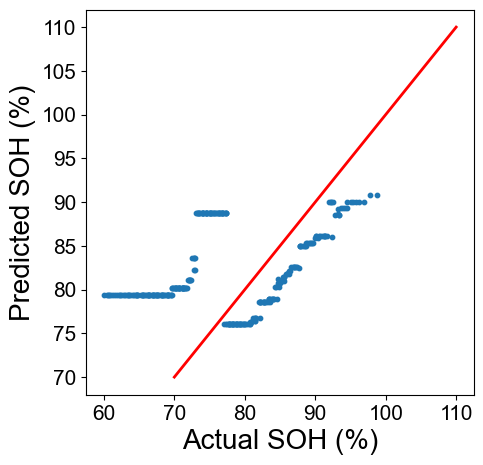

In [161]:
font = FontProperties(family='Arial', size=12)


# get predictions
# y_pred = model.predict(X)
y_pred_some = model_some.predict(X_some_test)
# model evaluation
plt.figure(figsize=(5, 5))

plt.scatter(y_test, y_pred_some,s=10)
plt.plot([70, 110], [70, 110], color="r", linestyle="-", linewidth=2)

plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15
plt.ylabel("Predicted SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
plt.xlabel("Actual SOH (%)", fontdict={'size': 20, 'family': 'Arial'})

plt.show()
plt.close()

In [162]:
# mse = mean_squared_error(y, y_pred)
mse_some = mean_squared_error(y_test, y_pred_some)
rmse_some = np.sqrt(mse_some)
r2_some = r2_score(y_test, y_pred_some)

print("均方误差 (MSE):", mse_all)
print("均方根误差 (RMSE):", rmse_all)
print("决定系数 (R^2):", r2_all)
print("     ")
print("top10Z 均方误差 (MSE):", mse_preferred)
print("top10Z 均方根误差 (RMSE):", rmse_preferred)
print("top10Z 决定系数 (R^2):", r2_preferred)
print("     ")
print("bot10Z 均方误差 (MSE):", mse_preferred_bot)
print("bot10Z 均方根误差 (RMSE):", rmse_preferred_bot)
print("bot10Z 决定系数 (R^2):", r2_preferred_bot)
print("     ")
print("some 均方误差 (MSE):", mse_some)
print("some 均方根误差 (RMSE):", rmse_some)
print("some 决定系数 (R^2):", r2_some)
print("     ")
print(meantop)
print(meanbottom)

均方误差 (MSE): 66.67762218900369
均方根误差 (RMSE): 8.16563666770716
决定系数 (R^2): 0.2067269898862506
     
top10Z 均方误差 (MSE): 67.28186182456894
top10Z 均方根误差 (RMSE): 8.202552153114842
top10Z 决定系数 (R^2): 0.19953826631155291
     
bot10Z 均方误差 (MSE): 67.14002796656507
bot10Z 均方根误差 (RMSE): 8.193901876796248
bot10Z 决定系数 (R^2): 0.20122568358560988
     
some 均方误差 (MSE): 94.98981468403416
some 均方根误差 (RMSE): 9.746271835119014
some 决定系数 (R^2): -0.1301071296597318
     
[ 91 106 107   8 101 119  11  90  35   7]
[ 50  24  33  18   0  43  66 108  37  23]


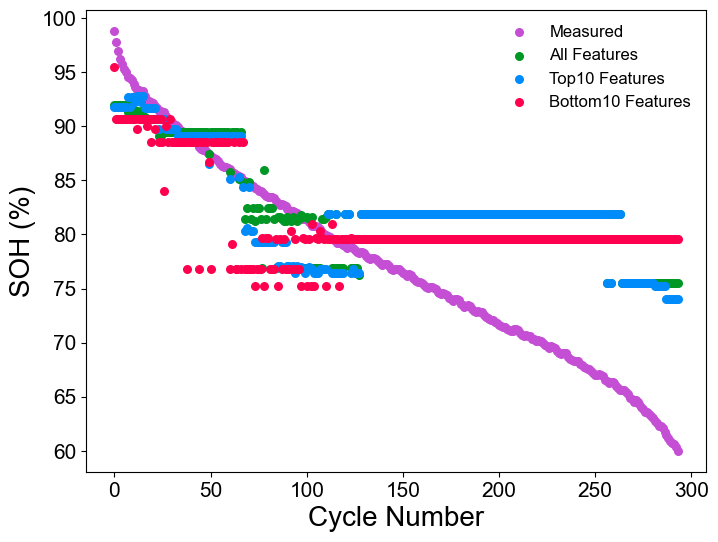

In [163]:

font = FontProperties(family='Arial', size=12)
plt.figure(figsize=(8, 6))

x = list(range(len(y_test)))

# 绘制图形

s_point=30
plt.scatter(x, y_test, color=purplese, label='Measured', s=s_point)
plt.scatter(x, y_pred, color=greense, label='All Features', s=s_point)
plt.scatter(x, y_pred_select, color=bluese, label='Top10 Features', s=s_point)
plt.scatter(x, y_pred_select_bot, color=redse, label='Bottom10 Features', s=s_point)

# plt.scatter(x, y_pred_some, color='orange', label='Final10 Features', s=s_point)
plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15
# # 添加图例

plt.legend(prop=font, facecolor='white', frameon=False)



# 添加坐标轴名称
plt.xlabel('Cycle Number', fontdict={'size': 20, 'family': 'Arial'})
plt.ylabel('SOH (%)', fontdict={'size': 20, 'family': 'Arial'})
# 显示图表
# 添加刻度线
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_SOH走势对比图全.pdf", format='pdf', dpi=600, bbox_inches='tight')
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_SOH走势对比图全.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()

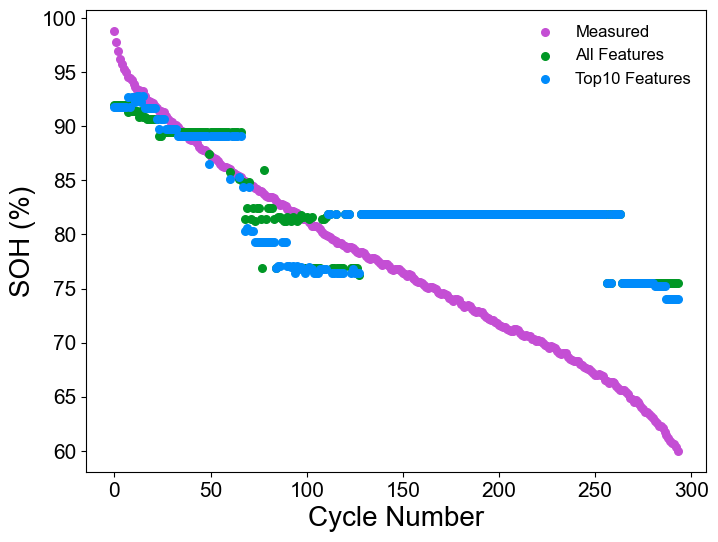

In [164]:
font = FontProperties(family='Arial', size=12)
plt.figure(figsize=(8, 6))

x = list(range(len(y_test)))

# 绘制图形

s_point=30
plt.scatter(x, y_test, color=purplese, label='Measured', s=s_point)
plt.scatter(x, y_pred, color=greense, label='All Features', s=s_point)
plt.scatter(x, y_pred_select, color=bluese, label='Top10 Features', s=s_point)
# plt.scatter(x, y_pred_select_bot, color=redse, label='Bottom10 Features', s=s_point)

# plt.scatter(x, y_pred_some, color='orange', label='Final10 Features', s=s_point)
plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15
# # 添加图例

plt.legend(prop=font, facecolor='white', frameon=False)



# 添加坐标轴名称
plt.xlabel('Cycle Number', fontdict={'size': 20, 'family': 'Arial'})
plt.ylabel('SOH (%)', fontdict={'size': 20, 'family': 'Arial'})
# 显示图表
# 添加刻度线
plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_SOH走势对比图无底部.pdf", format='pdf', dpi=600, bbox_inches='tight')
plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_SOH走势对比图无底部.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()

## 随机选择k个点，作为输入特征的性能。

In [165]:
import random
import numpy as np

from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error

# 初始化一个空列表来存储所有的 r2_score
r2_scores = []
same_variables = []
mse_sames = []

# 设置循环次数 w
w = 200
# 设置特征数量
random_number = 10

# 特征总数
total_features = X_train.shape[1]

for _ in range(w):
    # 随机选择五个特征的索引
    random_features = random.sample(range(total_features), random_number)

    # 转化成字符串并用逗号分隔
    five = ",".join(map(str, random_features))

    # 复制到 some 变量
    same = five

    # 存储 some 变量
    same_variables.append(same)
    
    # 从 X_train 和 X_test 中提取对应的特征
    X_same_train = X_train.iloc[:, random_features]
    X_same_test = X_test.iloc[:, random_features]

    # 初始化 模型
    model_same =  DecisionTreeRegressor()


    # 训练模型
    model_same.fit(X_same_train, y_train)

    # 预测
    y_pred_same = model_same.predict(X_same_test)

    # 计算 R-squared 分数
    r2_same_random = r2_score(y_test, y_pred_same)

    # 存储 R-squared 分数
    r2_scores.append(r2_same_random)
    
    # mse = mean_squared_error(y, y_pred)
    mse_same = mean_squared_error(y_test, y_pred_same)
    mse_sames.append(mse_same)
    
# 输出所有 R-squared 分数
np.shape(r2_scores)


(200,)

In [166]:
# 计算R-squared的平均值
average_r2 = sum(r2_scores) / len(r2_scores)

std_deviation = np.std(r2_scores)
print("Random_numbers:",random_number,".","Average R-squared:", average_r2,f"R-squared标准差: {std_deviation}")

Random_numbers: 10 . Average R-squared: 0.37718299584496795 R-squared标准差: 0.373220428723389


In [167]:
greense = (0/255, 151/255, 37/255,1)
bluese = (0/255, 139/255, 251/255,1)
redse = (255/255, 0/255, 78/255,1)
purplese = (196/255, 78/255, 212/255,1)
brownse = (208/255, 134/255, 48/255,1)
greyse = (158/255, 158/255, 158/255,1)

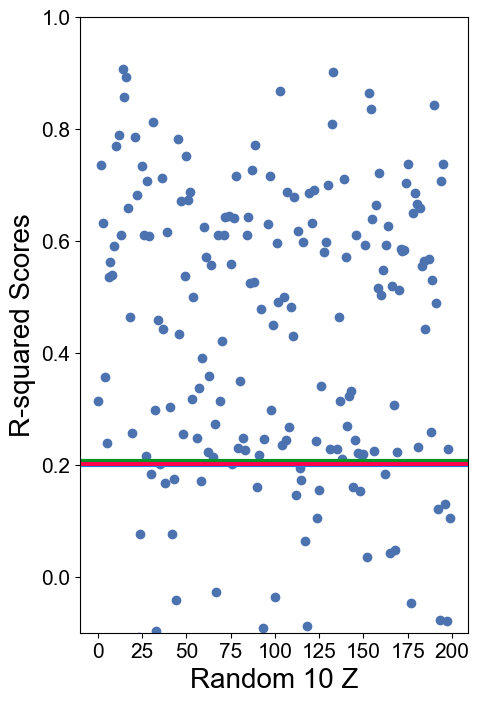

In [168]:
import matplotlib.patches as mpatches
font = FontProperties(family='Arial', size=12)

# plt.figure(figsize=(5, 8), facecolor='white')

plt.figure(figsize=(5, 8))

# # 使用序号作为横坐标，r2_scores 作为纵坐标
plt.scatter(range(len(same_variables)), r2_scores,color=bluegreyse)

# 添加标签

plt.xlabel("Random 10 Z", fontdict={'size': 20, 'family': 'Arial'})
plt.ylabel("R-squared Scores", fontdict={'size': 20, 'family': 'Arial'})
plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15


y_allfe = r2_all ##全部特征，绿色
plt.axhline(y=y_allfe, color=greense, linewidth=3)

y_topfe=r2_preferred#顶部十个特征，蓝色
plt.axhline(y=y_topfe, color=bluese, linewidth=3)

y_bottomfe= r2_preferred_bot #底部十个特征，红色
plt.axhline(y=y_bottomfe, color=redse, linewidth=3)

# y_some= r2_some #最优十个特征，棕色
# plt.axhline(y=y_some, color=purplese, linewidth=3)

plt.ylim(-0.10, 1.0)
# plt.savefig( f"{select_battery}_{MLmodel}_性能图.pdf", format='pdf', dpi=600, bbox_inches='tight')
# plt.savefig(f"{select_battery}_{MLmodel}_性能图.eps", format='eps', dpi=600, bbox_inches='tight')
# 创建自定义图例
legend_elements = [
    mpatches.Patch(color=greense, label='All Z'),
    mpatches.Patch(color=bluese, label='Top10 Z'),
    mpatches.Patch(color=redse, label='Bottom10 Z'),
    mpatches.Patch(color=bluegreyse, label='Random10 Z')
]

# 添加自定义图例到图表
# plt.legend(handles=legend_elements,prop=font, facecolor='white', frameon=False,loc=(0.60,0.05))
plt.grid(False)
# 显示图表

plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_random.pdf", format='pdf', dpi=600, bbox_inches='tight')
plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_random.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()

In [169]:
# 输出所有的 R-squared 分数和 some 变量
for i in range(w):
    print(f"Iteration {i+1}: R-squared = {r2_scores[i]},mse= {mse_sames[i]} ,same = {same_variables[i]}")

Iteration 1: R-squared = 0.31363382959412334,mse= 57.691694549237184 ,same = 60,31,69,91,117,49,111,110,99,47
Iteration 2: R-squared = -0.15263088329765284,mse= 96.8830220870342 ,same = 63,16,41,34,86,115,106,110,111,58
Iteration 3: R-squared = 0.7343963914961746,mse= 22.324996355686746 ,same = 8,87,101,113,72,37,53,51,94,82
Iteration 4: R-squared = 0.6309979837853658,mse= 31.016026904296087 ,same = 82,44,119,24,103,62,49,41,89,99
Iteration 5: R-squared = 0.3563725745289913,mse= 54.0993400240395 ,same = 32,15,58,8,109,50,46,101,96,81
Iteration 6: R-squared = 0.2389127310203486,mse= 63.97228788435524 ,same = 47,96,114,92,15,117,109,1,54,24
Iteration 7: R-squared = 0.5358800849102734,mse= 39.011049101882065 ,same = 69,10,109,0,41,51,53,106,18,115
Iteration 8: R-squared = 0.5617807449918537,mse= 36.83399983215109 ,same = 102,24,52,18,44,101,32,33,40,114
Iteration 9: R-squared = 0.5395688490845059,mse= 38.70099440341383 ,same = 19,119,76,20,61,26,22,13,102,108
Iteration 10: R-squared = 0.5

normalized_mean #全部的shap值
top_k_values #前10个shap的值
meantop #前10个shap的特征

mse_all
rmse_all
r2_all

rmse_preferred
mse_preferred
r2_preferred

rmse_preferred_bot
mse_preferred_bot
r2_preferred_bot

rmse_some
mse_some
r2_some
r2_scores #随机特征的结果
select_battery = '第1节'

## 保存重要数据

In [170]:

# 创建一个包含多个变量的字典
values_to_save = [ select_battery,MLmodel,r2_all,r2_preferred,r2_preferred_bot,r2_some,average_r2,meantop, normalized_mean, top_k_values,rmse_all,mse_all,  rmse_preferred, mse_preferred,rmse_preferred_bot,mse_preferred_bot,rmse_some,mse_some,r2_scores]
value_names = ["电池","模型","全部特征精度","顶部特征精度","底部特征精度","终选特征精度","随机特征平均精度","top10特征", "全部的shap值", "top10 shap值","rmse_all","mse_all","rmse_top", "mse_top", "rmse_bot","mse_bot","rmse_some终选","mse_some终选","r2_scores随机特征"]

file_name = f"被测电池_{select_battery}_模型{MLmodel}_全部数据.txt"
# 打开文件以写入数据
with open(file_name, "w") as file:
    for name, value in zip(value_names, values_to_save):
        file.write(f"{name}: {value}\n")


## END